In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [194]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [83]:
df1 = pd.read_csv('/content/drive/MyDrive/Bts usd/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')                    
df1.head()  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [84]:
df2 = pd.read_csv('/content/drive/MyDrive/Bts usd/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [85]:
final_df = pd.concat([df1, df2], ignore_index=True)  

In [86]:
#Now save the Dataframe into the Final preprocessed_data file.
final_df.to_csv("/content/drive/MyDrive/Bts usd/final_df.csv")

In [100]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [101]:
final_df.set_index("Date",inplace=True)

In [102]:
final_df.shape

(2227, 6)

In [103]:
final_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2.227000e+03
mean,13430.267912,13791.566833,13028.580974,13444.789565,13444.789565,1.774692e+10
std,16710.713497,17159.401762,16186.954946,16711.539182,16711.539182,2.079811e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2674.179931,2763.579956,2570.520019,2669.770019,2669.770019,1.230715e+09
50%,7467.399902,7634.606445,7323.259766,7472.589844,7472.589844,9.809887e+09
75%,11544.887207,11867.149902,11289.679688,11579.117188,11579.117188,2.900367e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [104]:
#Checking whether there are any rows with null values
nan_rows = final_df[final_df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


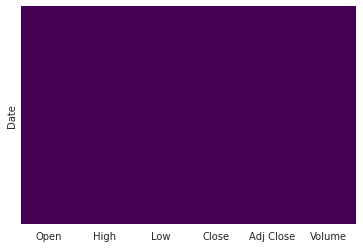

In [105]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2227 entries, 2016-01-01 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2227 non-null   float64
 1   High       2227 non-null   float64
 2   Low        2227 non-null   float64
 3   Close      2227 non-null   float64
 4   Adj Close  2227 non-null   float64
 5   Volume     2227 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 121.8 KB


In [16]:
final_df['Open'].value_counts()

46311.746094    2
17760.300781    2
9292.841797     1
9344.683594     1
9389.820313     1
               ..
16476.199219    1
17527.300781    1
17462.099609    1
15477.200195    1
37234.058594    1
Name: Open, Length: 2226, dtype: int64

In [17]:
final_df['Close'].value_counts()

47686.812500    2
6741.750000     2
1179.969971     2
9358.589844     1
8406.515625     1
               ..
16477.599609    1
17527.000000    1
17429.500000    1
15599.200195    1
37649.335938    1
Name: Close, Length: 2225, dtype: int64

In [18]:
final_df['High'].value_counts()

47827.312500    2
6536.919922     2
8745.590820     1
8792.994141     1
8687.747070     1
               ..
17712.400391    1
17705.199219    1
15739.700195    1
15572.799805    1
38121.738281    1
Name: High, Length: 2226, dtype: int64

In [108]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = final_df[final_df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [22]:
import warnings
warnings.filterwarnings("ignore")

Plotting distribution of variable:

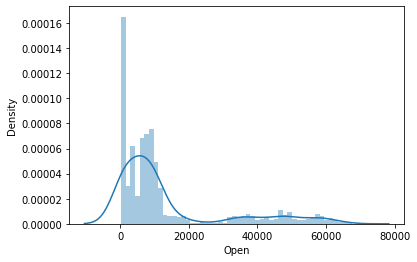

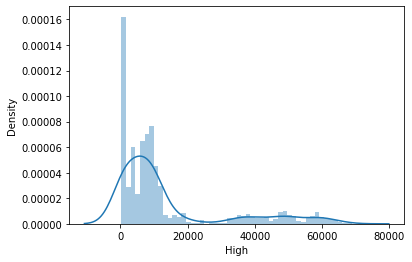

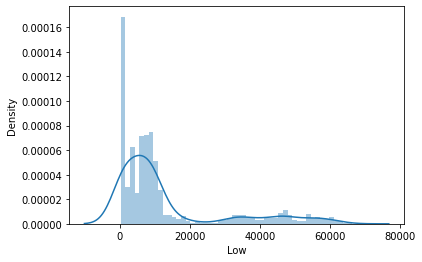

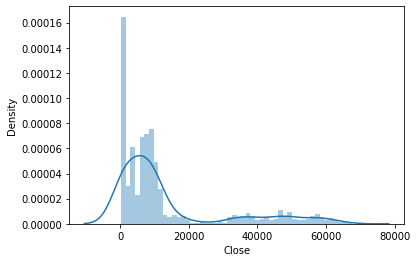

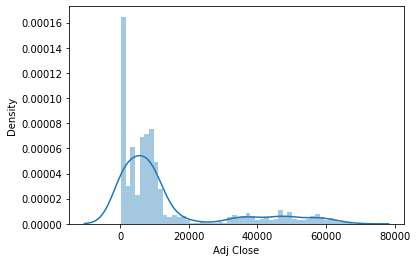

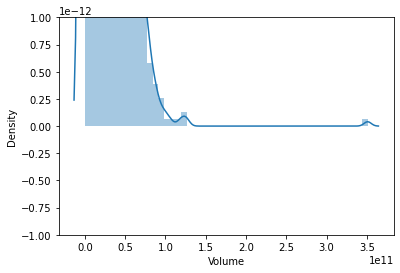

In [23]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
for i in columns:
    plt.figure()
    sns.distplot(final_df[i])

<h2>Corelation matrix:

In [24]:
final_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999489,0.998996,0.998719,0.998719,0.700858
High,0.999489,1.000000,0.998940,0.999432,0.999432,0.704807
Low,0.998996,0.998940,1.000000,0.999336,0.999336,0.692407
Close,0.998719,0.999432,0.999336,1.000000,1.000000,0.699617
Adj Close,0.998719,0.999432,0.999336,1.000000,1.000000,0.699617
Volume,0.700858,0.704807,0.692407,0.699617,0.699617,1.000000


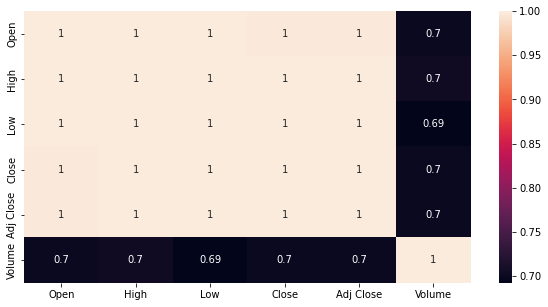

In [25]:
cor = final_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)

<h3>Observation:

- as we seen above corelation matrix we see that all the variable with volume have less corelated than other.
- all other varible are highly corelated with  each other

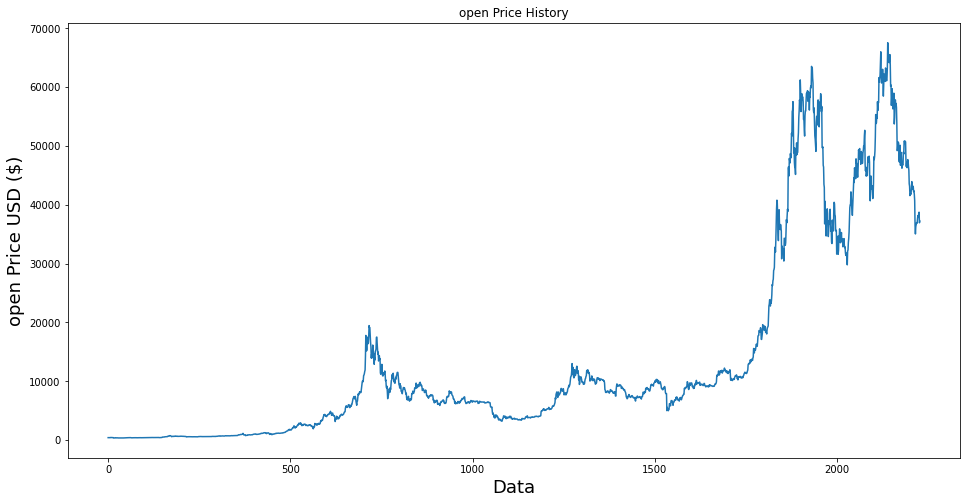

In [26]:
plt.figure(figsize=(16,8))
plt.title('open Price History')
plt.plot(final_df['Open'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('open Price USD ($)', fontsize=18)
plt.show()

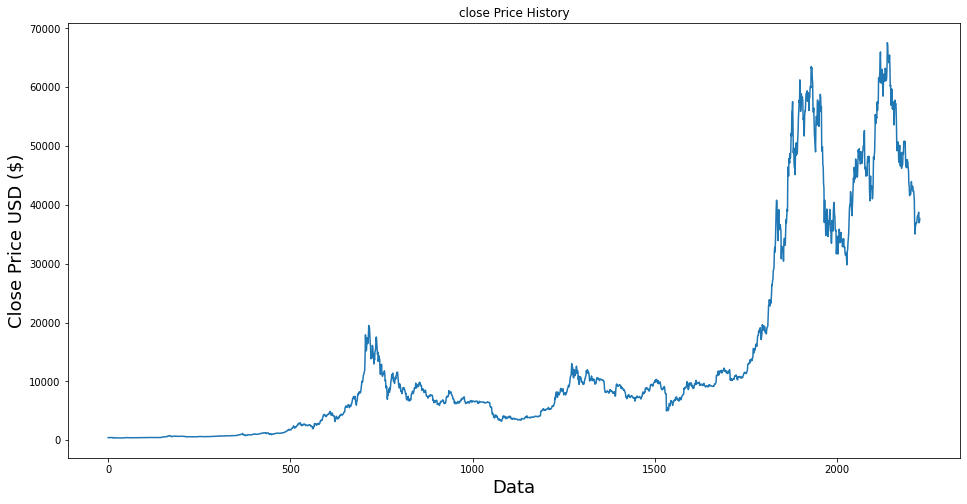

In [27]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(final_df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

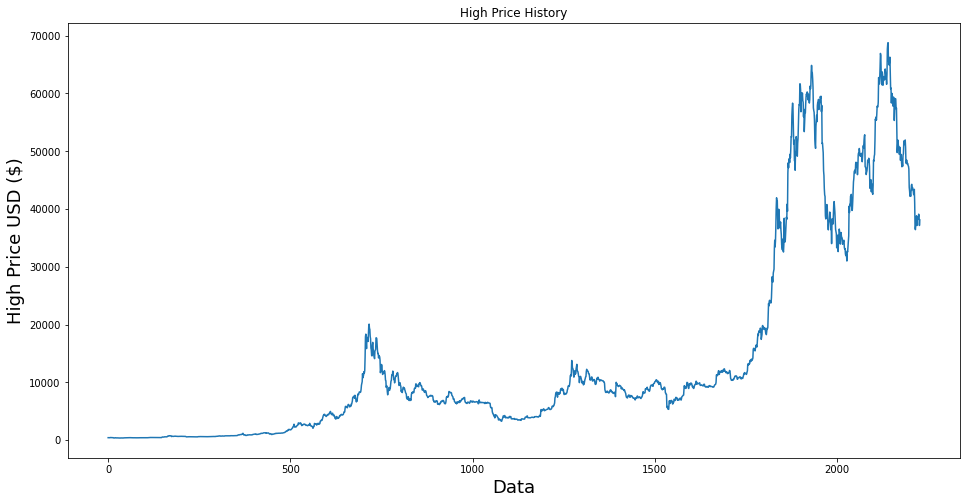

In [28]:
plt.figure(figsize=(16,8))
plt.title('High Price History')
plt.plot(final_df['High'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

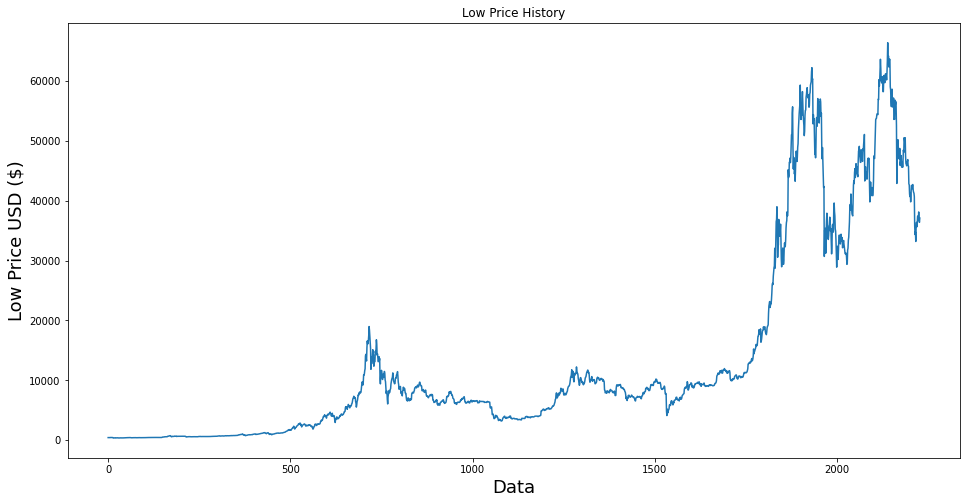

In [29]:
plt.figure(figsize=(16,8))
plt.title('Low Price History')
plt.plot(final_df['Low'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.show()

<Figure size 216x216 with 0 Axes>

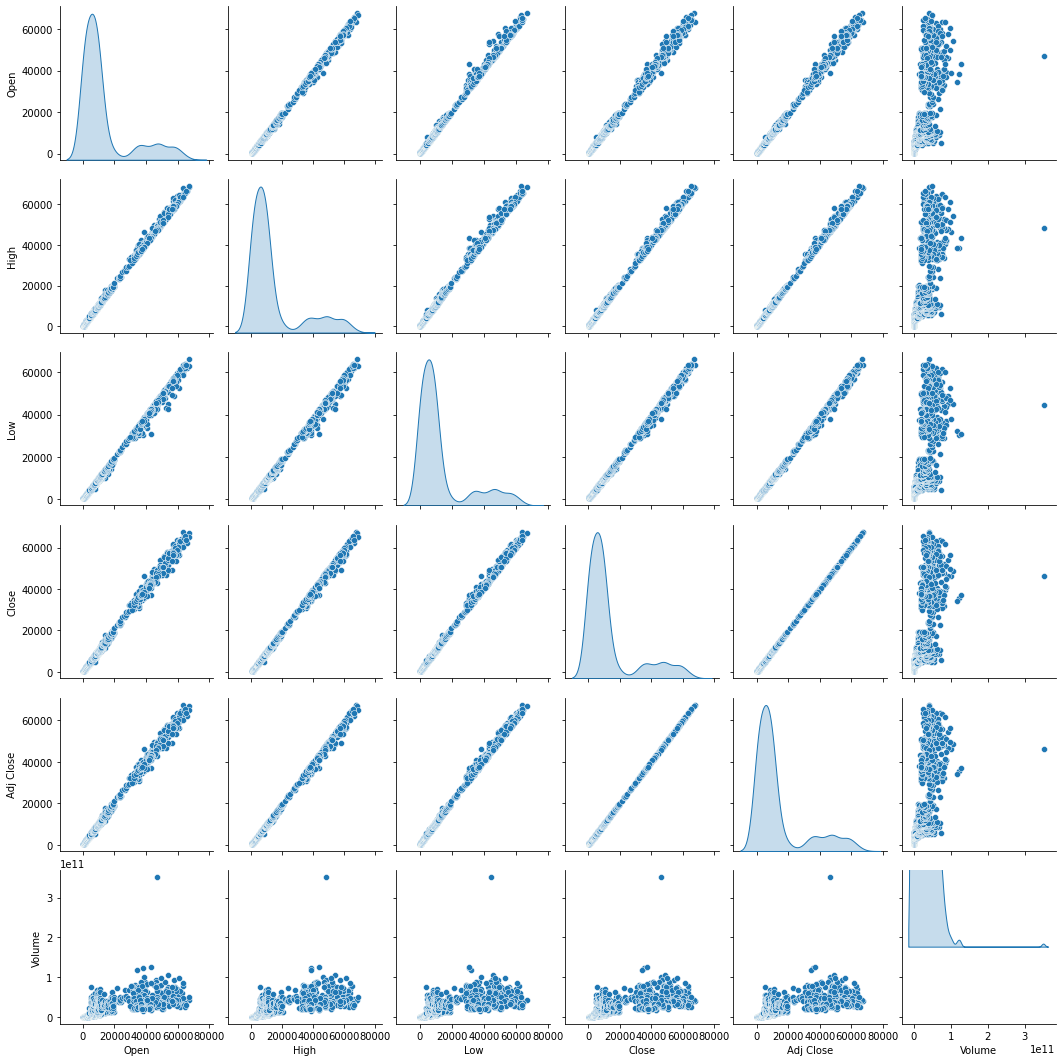

In [30]:
plt.figure(figsize=(3,3))
sns.pairplot(final_df,diag_kind='kde')
plt.show()

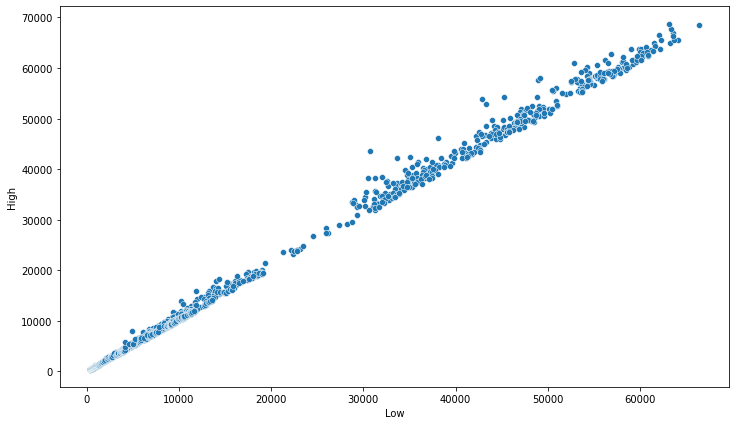

In [31]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Low',y='High',data=final_df)

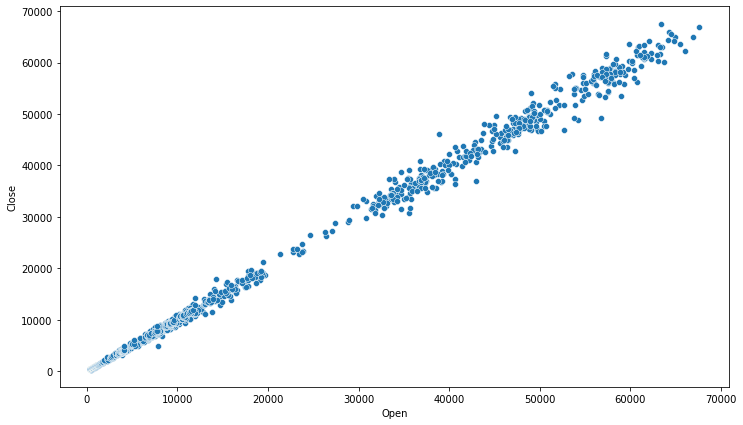

In [32]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Open',y='Close',data=final_df)

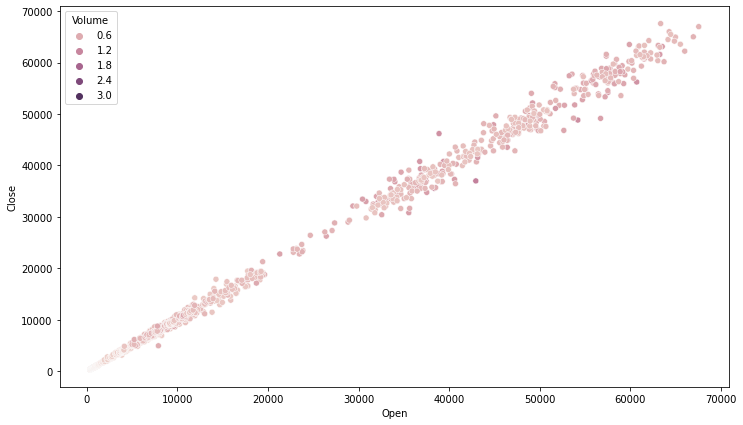

In [33]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Open',y='Close',hue='Volume',data=final_df)

<h3>Select Subset with relevant features

- We use the daily closing price Close as the value to predict, so we can discard the other features.

- 'Close' column has numerical data type
- The 'Date' is the index column and contains datetime values

In [158]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(final_df, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [159]:
df.head()

,Date,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


In [160]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2227 non-null   datetime64[ns]
 1   Close   2227 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.9 KB


<h3>Training a Linear Regression Model

Train Test Split

In [161]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [162]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [163]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [164]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [165]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  20.247666161365004
Intercept:  -9060.165316671293


<h3>Interpreting the coefficients:

- The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 20.24766 $
- The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

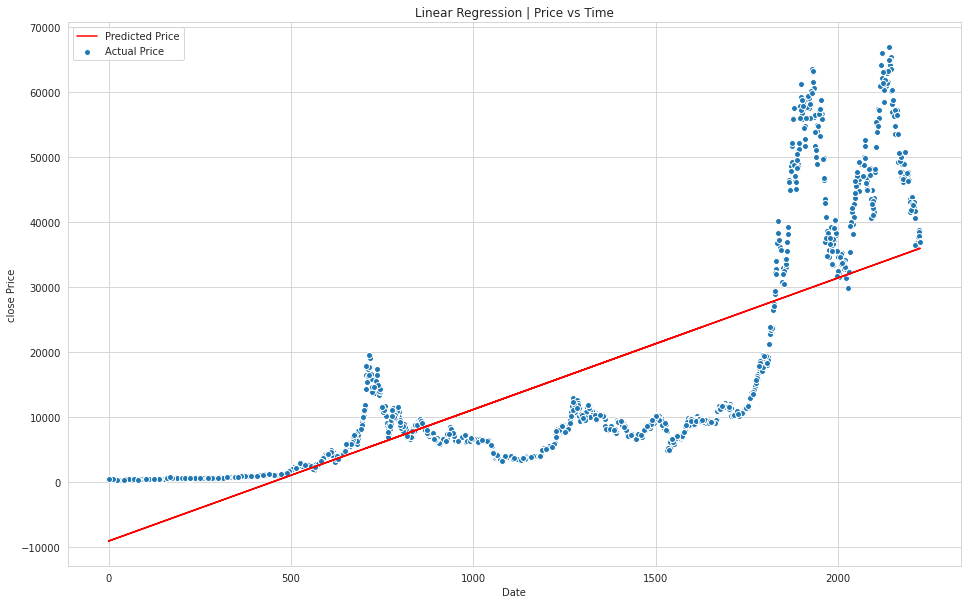

In [166]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('close Price')
plt.legend()
plt.show()

In [167]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [168]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [169]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [174]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample.tail()

,Date,Close,Prediction
1883,2021-02-26,46339.761719,29066.190065
1953,2021-05-07,57356.402344,30483.526696
1987,2021-06-10,36702.597656,31171.947346
2028,2021-07-21,32110.693359,32002.101659
2099,2021-09-30,43790.894531,33439.685956


<Figure size 1152x576 with 0 Axes>

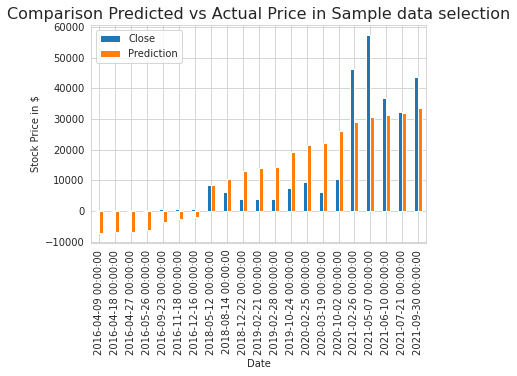

In [197]:
plt.figure(figsize=(16,8))
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar')
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
# Set x label
plt.xlabel('Date')
# Set y label
plt.ylabel('Stock Price in $')
# Show plot
plt.show()

<h3>observations:

- We can see some larger variations between predicted and actual values in the random sample.

<h3> Let's see how the model performed over the whole test data set.

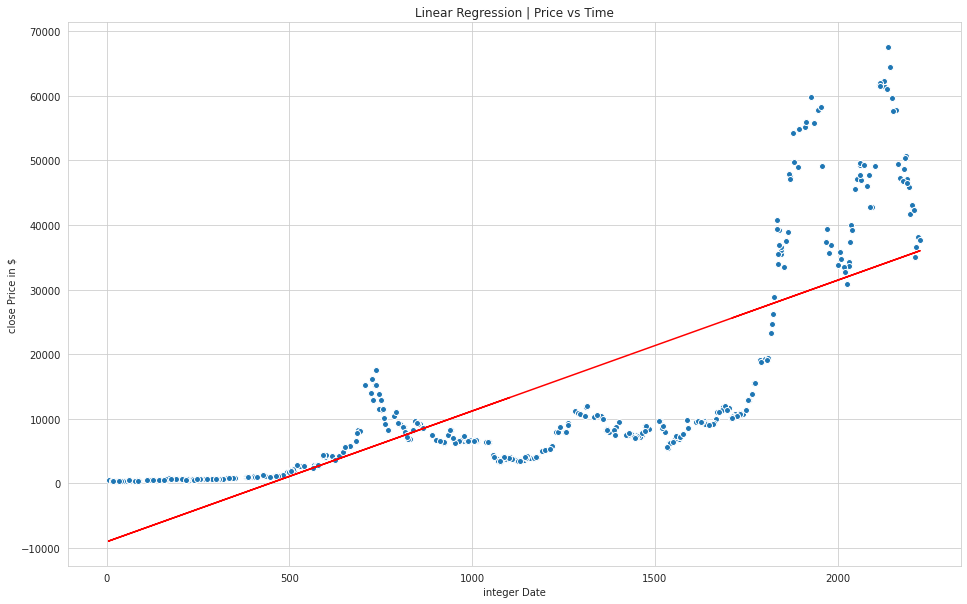

In [177]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('integer Date')
plt.ylabel('close Price in $')

plt.show()

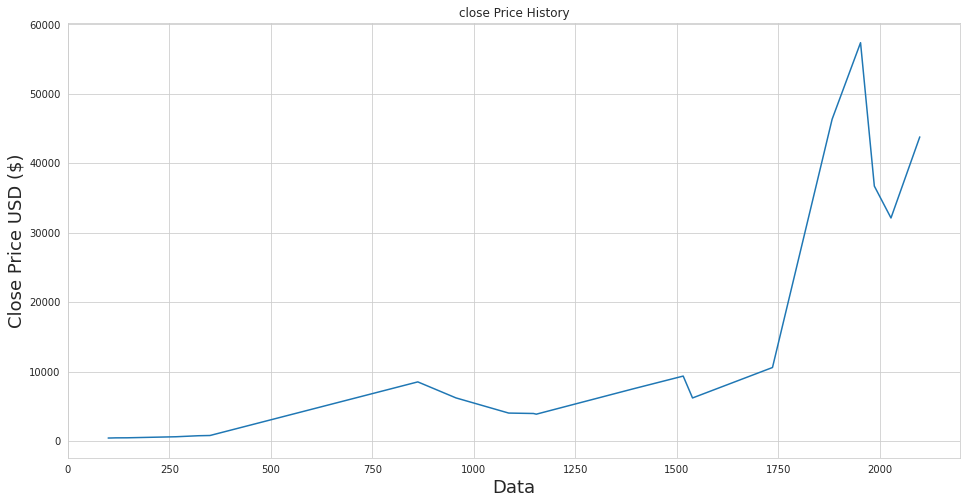

In [175]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(df_sample['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

<h2>Error Evaluation Metrics

In [178]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8457.102685895494
Mean Squared Error: 111176468.86027126
Root Mean Squared Error: 10544.025268381676


In [179]:
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Model R^2 Square value 0.5945867279273416
